In [1]:
import numpy  as np
import pandas as pd

import seaborn           as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

sns.set_context(context='poster')

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

xkcd_rgb = pd.read_csv(
    'https://xkcd.com/color/rgb.txt', 
    sep='\t', skiprows=1, header=None, 
    usecols=[0,1], names=['Name','hex']
)


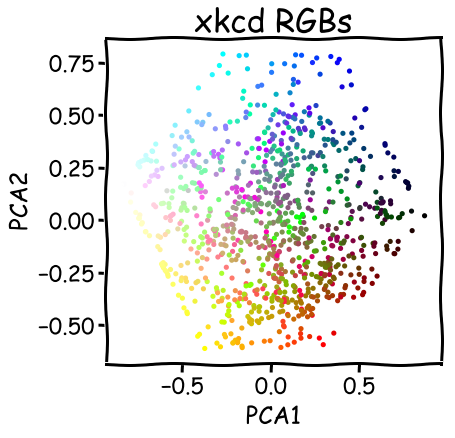

In [21]:
xkcd_rgbs = np.array( sns.xkcd_palette(xkcd_rgb['Name']) )

model_pca = PCA(  n_components=2, random_state=2019 )
pca_rgbs  = model_pca.fit_transform( xkcd_rgbs )


fig_df = pd.concat(
    [
        xkcd_rgb[['Name','hex']],
        pd.DataFrame(pca_rgbs).rename(columns={0:'PCA1',1:'PCA2'})
    ], axis=1
)

# plt.xkcd()
with plt.xkcd():
    fig, ax = plt.subplots(1,1, figsize=(6,6))

    ax.scatter(fig_df['PCA1'],fig_df['PCA2'],c=fig_df['hex'],s=10)
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_title('xkcd RGBs',fontsize=32)
    for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(3)

fig.savefig('xkcd_rgbs_PCA.svg', bbox_inches='tight',)
fig.savefig('xkcd_rgbs_PCA.png', bbox_inches='tight',)

plt.show()

array(['lavender pink', 'candy pink', 'greenish beige', 'sun yellow',
       'peachy pink', 'light bluish green', 'pinky', 'rosa', 'key lime',
       'yellow/green', 'pale lime green', 'light grey blue',
       'purply pink', 'lightblue', 'carolina blue', 'light lime', 'maize',
       'faded pink', 'hospital green', 'blush', 'apricot',
       'bright yellow', 'light magenta', 'seafoam', 'spring green',
       'sand', 'seafoam green', 'peach', 'light green', 'pink'],
      dtype=object)

In [234]:
my_colos_c_names = fig_df.query('-0.4<PCA1<0.4')['Name'].values

Total:  18


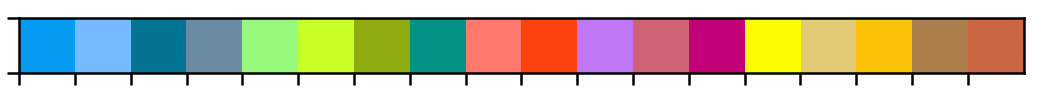

In [240]:
xkcd_name_list = [
    # Blue
    'azure',
    'sky blue',
    'sea blue',
    'grey blue', #'steel blue', 'blue grey',

    # Green
    'light green',
    'green yellow',
    'pea green',
    'teal',

    # Red
    'salmon',
    'orangered',
    'light purple',
    'rose',
    'magenta',

    # Yellow
    'bright yellow',
    'sand',
    'goldenrod',
    'tan brown',
    'terracotta',
]
dif_set = set(xkcd_name_list) - set( [ i for i in xkcd_name_list if i in my_colos_c_names ] )
if len( dif_set ) == 0:
    print ('Total: ', len(xkcd_name_list))
    g = sns.palplot(sns.xkcd_palette(xkcd_name_list))

else:
    print ('Missing ', dif_set)

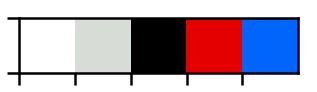

In [194]:
keep_colors_names = ['white', 'light grey', 'black', 'red', 'bright blue']

sns.palplot(sns.xkcd_palette(keep_colors_names))

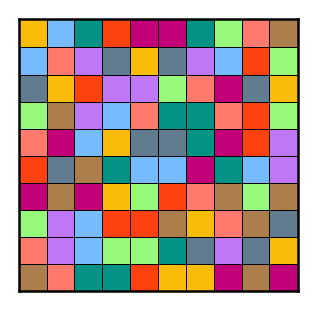

In [186]:
rgb_list = sns.xkcd_palette(xkcd_name_list)

n = len(rgb_list)
matrix = np.random.permutation(np.repeat(np.arange(0,n),n)).reshape(n,n)
m_id_x = np.repeat(np.arange(0,n),n).reshape(n,n)
m_id_y = m_id_x.T
m_id_x = m_id_x.flatten()
m_id_y = m_id_y.flatten()

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(
    x         = m_id_x,
    y         = m_id_y,
    color     = [ rgb_list[matrix[i]] for i in list(zip(m_id_x,m_id_y)) ],
    edgecolor = 'k',
    marker = 's', 
    s = 850,
    linewidth = 1,
    zorder    = 1,
)

ax.set_xticks([])
ax.set_yticks([])

plt.show()